In [1]:
import pandas as pd 

C:\Users\mei88\AppData\Local\Temp\ipykernel_10060\217833862.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/annwanginnt/AI2/main/test.csv', na_values=['', 'NULL', 'NaN'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

### Deal with Null values

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Categorical data for those 'NA' has real meanings
na_columns_with_meaning = {
    'Alley': 'NoAlleyAccess',
    'MasVnrType' : 'NoMas',
    'BsmtQual': 'NoBasement',
    'BsmtCond': 'NoBasement',
    'BsmtExposure': 'NoBasement',
    'BsmtFinType1': 'NoBasement',
    'BsmtFinType2': 'NoBasement',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'PoolQC': 'NoPool',
    'Fence': 'NoFence',
    'MiscFeature': 'None'
}

for column, fill_value in na_columns_with_meaning.items():
    df[column] = df[column].fillna(fill_value)

# fill in numberical missing value with average value
numeric_columns_with_nulls = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for column in numeric_columns_with_nulls:
    df[column] = df[column].fillna(df[column].median())

# fill in with the most often value for column 'Electrical'
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# check missing value again
missing_values_2 = df.isnull().sum()
missing_values_2[missing_values > 0]




LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Feature Engineering

In [6]:
# Onehot encode categorical data
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
# split data 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear models

In [8]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# create models
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Bayesian Ridge": BayesianRidge()
}

# create an empty storage for the performance 

model_performance ={}

# store ridge predicted value for later use 
ridge_predictions = None

# train model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if name == 'Ridge':
        ridge_predictions = y_pred
    
    R2 = r2_score(y_test, y_pred)
    mse =mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mse)
    
    model_performance[name] = {'R2 Score': R2, 'MSE' : mse, 'RMSE':RMSE }
    
model_performance_df = pd.DataFrame(model_performance).T
model_performance_df


C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.866e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.217e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


,R2 Score,MSE,RMSE
Linear Regression,0.101632,6.890777e+09,83010.701869
Elastic Net,0.836871,1.251255e+09,35373.075966
Lasso,0.836303,1.255610e+09,35434.585961
Ridge,0.878720,9.302557e+08,30500.092879
Bayesian Ridge,0.877978,9.359508e+08,30593.312332


### Check feature's significants

In [9]:
# using Ridge model to check features' coefficient
ridge_model = models['Ridge']
# get features' name
feature_names = X_train.columns


ridge_coefficients = ridge_model.coef_
ridge_features_coefficients = pd.DataFrame(list(zip(feature_names, ridge_coefficients)), columns=['Feature', 'Coefficient'])
ridge_features_sorted = ridge_features_coefficients.sort_values(by='Coefficient', ascending=False, key=abs)

# select top 20 features
ridge_features_sorted.head(20)



,Feature,Coefficient
237,PoolQC_Gd,-140233.519230
92,Condition2_PosN,-94630.993512
118,RoofMatl_WdShngl,70241.143827
238,PoolQC_NoPool,49443.954992
112,RoofMatl_CompShg,43124.913767
78,Neighborhood_StoneBr,41200.733399
236,PoolQC_Fa,-35296.321452
139,Exterior2nd_ImStucc,35058.277568
71,Neighborhood_NoRidge,31408.997239
117,RoofMatl_WdShake,30954.348539


# Predict on Test data

In [10]:
missing_values_test = df_test.isnull().sum()
missing_values_test[missing_values > 0]

LotFrontage      227
Alley           1352
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [11]:
# Categorical data for those 'NA' has real meanings
na_columns_with_meaning = {
    'Alley': 'NoAlleyAccess',
    'MasVnrType' : 'NoMas',
    'BsmtQual': 'NoBasement',
    'BsmtCond': 'NoBasement',
    'BsmtExposure': 'NoBasement',
    'BsmtFinType1': 'NoBasement',
    'BsmtFinType2': 'NoBasement',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'PoolQC': 'NoPool',
    'Fence': 'NoFence',
    'MiscFeature': 'None'
}

for column, fill_value in na_columns_with_meaning.items():
    df_test[column] = df_test[column].fillna(fill_value)

# fill in numberical missing value with average value
numeric_columns_with_nulls = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for column in numeric_columns_with_nulls:
    df_test[column] = df_test[column].fillna(df_test[column].median())

# fill in with the most often value for column 'Electrical'
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

# check missing value again
missing_values_2 = df_test.isnull().sum()
missing_values_2[missing_values > 0]




LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [12]:
# Onehot encode categorical data
df_test_encoded = pd.get_dummies(df_test, drop_first=True)


In [13]:
# split data 
X_test_test = df_test_encoded


In [14]:
ridge_model = models['Ridge']
y_test_test_pred = ridge_model.predict(X)

predictions = pd.DataFrame(y_test_test_pred, columns=['PredictedSalesPrice'])

predictions


,PredictedSalesPrice
0,207643.392509
1,204861.928806
2,213066.705192
3,173031.373256
4,298810.869730
...,...
1455,173243.493565
1456,205661.477288
1457,255090.719825
1458,145258.442140


# Non-lineaer models

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# split data 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
non_linear_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Randome Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# store performance
non_linear_model_performance ={}

#store Gradient boosting predicted value for later use 
gb_predictions = None

# create models
for name, model in non_linear_models.items():
    model.fit(X_train, y_train)
    y_pred_nonlinear = model.predict(X_test)
    
    if name == 'Gradient Boosting':
        gb_predictions = y_pred
    
    R2_nl = r2_score(y_test, y_pred_nonlinear)
    MSE_nl = mean_squared_error(y_test, y_pred_nonlinear)
    RMSE_nl = np.sqrt(MSE_nl)
    
    non_linear_model_performance[name] = {'R2 Score_nl' :R2_nl, 'MSE_nl' :MSE_nl, 'RMSE_nl' : RMSE_nl}

# convert performance to dataset
non_linear_performance_df = pd.DataFrame(non_linear_model_performance).T
non_linear_performance_df

,R2 Score_nl,MSE_nl,RMSE_nl
Decision Tree,0.770433,1.760855e+09,41962.543672
Randome Forest,0.886965,8.670177e+08,29445.164636
Gradient Boosting,0.900258,7.650537e+08,27659.604111


## Predicting with non_linear model- Gradient Boosting Tree model

In [18]:
model_gb = non_linear_models['Gradient Boosting']
y_pred_gb = model_gb.predict(X)

y_test_test_pred_gb = model_gb.predict(X)

predictions_gb = pd.DataFrame(y_test_test_pred, columns=['PredictedSalesPrice'])

predictions_gb


,PredictedSalesPrice
0,207643.392509
1,204861.928806
2,213066.705192
3,173031.373256
4,298810.869730
...,...
1455,173243.493565
1456,205661.477288
1457,255090.719825
1458,145258.442140


# A comparison of the models’ performances (MSE and R2 on a test set) and their interpretations.

In [19]:
ridge_mse = model_performance_df.loc['Ridge', 'MSE']
ridge_r2 = model_performance_df.loc['Ridge', 'R2 Score']

gb_mse = non_linear_performance_df.loc['Gradient Boosting','MSE_nl']
gb_r2 = non_linear_performance_df.loc['Gradient Boosting','R2 Score_nl']

performance_summary_df = pd.DataFrame({
    'Model' :['Ridge Regression', 'Gradient Boosting'], 
    'MSE Score' :[ridge_mse,gb_mse],
    'R2 Score' :[ridge_r2, gb_r2]
})
performance_summary_df


,Model,MSE Score,R2 Score
0,Ridge Regression,9.302557e+08,0.878720
1,Gradient Boosting,7.650537e+08,0.900258


# Two scatter plots (for the linear model and the best model) of predictions versus ground truth. The plots should be side-by-side and with the MSE for the respective models included in the plots

In [20]:

ridge_mse = model_performance_df.loc['Ridge', 'MSE']
gb_mse = non_linear_performance_df.loc['Gradient Boosting','MSE_nl']


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot Ridge Regression predicted value vs actual value
axs[0].scatter(y_test, ridge_predictions, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 绘制45度线
axs[0].set_title(f'Ridge Regression\nMSE: {ridge_mse:.2f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# plot Gradient Boosting predicted value vs actual value
axs[1].scatter(y_test, gb_predictions, color='red', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 绘制45度线
axs[1].set_title(f'Gradient Boosting\nMSE: {gb_mse:.2f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')


plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

## feature significants

### Individual Conditional Expectation(ICE) Plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

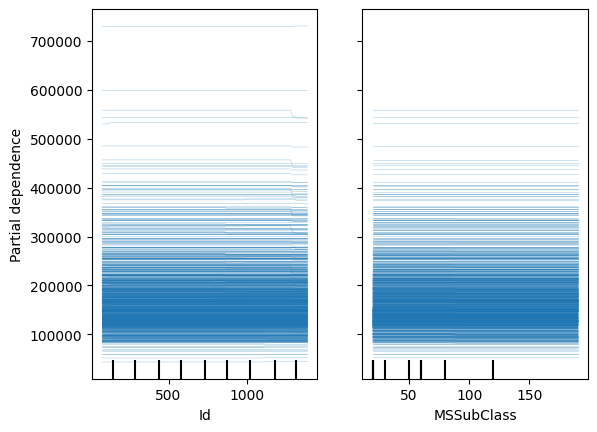

In [ ]:
# plot ICE

model_gb = non_linear_models['Gradient Boosting']
features = [0, 1] 
PartialDependenceDisplay.from_estimator(model_gb, X_train, features, kind='individual', feature_names=feature_names)
plt.show()

# Check Feature Importance with Three Methods

Since Gradient Boosting model has the best performance, we will check Gradient Boosting model's feature importance

In [ ]:
from sklearn.inspection import permutation_importance

### Permutation method to check Gradient Boosting Tree model's feature importance

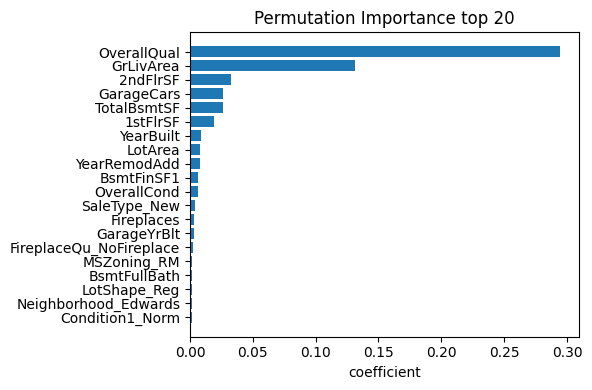

In [ ]:
result = permutation_importance(model_gb, X_test, y_test, n_repeats=10, random_state=42)
sorted_index = result.importances_mean.argsort()[-20:]

# plot
plt.figure(figsize=(6, len(sorted_index) * 0.2))
plt.barh(range(len(sorted_index)), result.importances_mean[sorted_index], align='center')
plt.yticks(range(len(sorted_index)), [feature_names[i] for i in sorted_index])
plt.xlabel('coefficient')
plt.title('Permutation Importance top 20')
plt.tight_layout()
plt.show()

### Decision tree method to check Gradient Boosting Tree model's feature importance

In [ ]:
dt_model = non_linear_models['Gradient Boosting']
importance = dt_model.feature_importances_

feature_importances = pd.DataFrame(zip(feature_names, importance), columns=['Feature','Importance'])
feature_importances_sorted = feature_importances.sort_values(by= 'Importance', ascending=True).tail(20)
feature_importances_sorted

,Feature,Importance
215,GarageType_Attchd,0.003278
212,FireplaceQu_NoFireplace,0.004378
63,Neighborhood_Edwards,0.004461
29,OpenPorchSF,0.004625
196,CentralAir_Y,0.004706
32,ScreenPorch,0.005401
25,GarageYrBlt,0.006952
24,Fireplaces,0.007314
5,OverallCond,0.007441
7,YearRemodAdd,0.010697


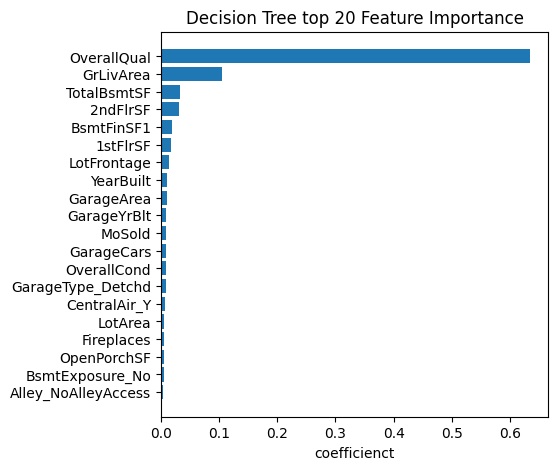

In [ ]:
# plot 

plt.figure(figsize=(5,5))
plt.barh(feature_importances_sorted['Feature'],feature_importances_sorted['Importance'],align='center')
plt.title('Decision Tree top 20 Feature Importance')
plt.xlabel('coefficienct')
plt.tight_layout
plt.show()

### Shaply to check Gradient Boosting Tree model's feature importance

In [ ]:
pip install shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   ----------------------------- --------- 337.9/450.3 kB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.6 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.6 MB 10.1 MB/s eta 0:00:01
   --------------------- ------------------ 1.4/2.6 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 2.0/2.6 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 13.0 MB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mei88\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


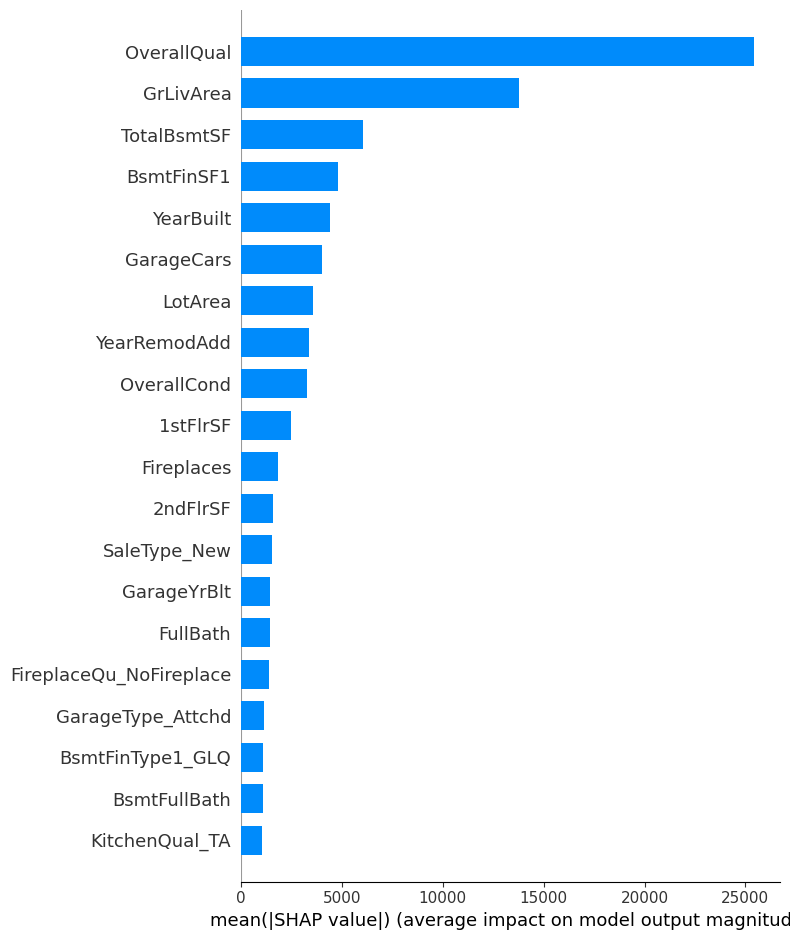

In [ ]:
explainer = shap.TreeExplainer(model_gb)
shap_values = explainer.shap_values(X_train)
shap_values
# plot
shap.summary_plot(shap_values, X_train, plot_type='bar')



# A table with feature rankings (most to least important features) for both models shown side-by-side

In [ ]:
gb_model = non_linear_models['Gradient Boosting']



# get Ridge model's feature importance using absolute value
ridge_importance = abs(ridge_model.coef_)

# get Gradient Boosting  model's feature importance using absolute value
gb_importance = gb_model.feature_importances_

# convert to DataFrame
ridge_df = pd.DataFrame({'Feature': feature_names, 'Ridge Importance': ridge_importance})
gb_df = pd.DataFrame({'Feature': feature_names, 'GB Importance': gb_importance})

# sort two dataframe
ridge_df = ridge_df.sort_values(by='Ridge Importance', ascending=False).reset_index(drop=True)
gb_df = gb_df.sort_values(by='GB Importance', ascending=False).reset_index(drop=True)

# concat two dataset
feature_importance_df = pd.concat([ridge_df, gb_df], axis=1)

# Most 20 important features for both models
feature_importance_df.head(20)



,Feature,Ridge Importance,Feature,GB Importance
0,PoolQC_Gd,140233.519230,OverallQual,0.521597
1,Condition2_PosN,94630.993512,GrLivArea,0.145543
2,RoofMatl_WdShngl,70241.143827,GarageCars,0.048362
3,PoolQC_NoPool,49443.954992,TotalBsmtSF,0.040229
4,RoofMatl_CompShg,43124.913767,BsmtFinSF1,0.039411
5,Neighborhood_StoneBr,41200.733399,1stFlrSF,0.031767
6,PoolQC_Fa,35296.321452,2ndFlrSF,0.029830
7,Exterior2nd_ImStucc,35058.277568,YearBuilt,0.019647
8,Neighborhood_NoRidge,31408.997239,LotArea,0.017168
9,RoofMatl_WdShake,30954.348539,FullBath,0.011355


In [ ]:
# least important 20 features for both models
feature_importance_df.tail(20)

,Feature,Ridge Importance,Feature,GB Importance
240,ScreenPorch,42.046962,Neighborhood_Timber,0.0
241,GarageYrBlt,38.161168,Condition1_PosA,0.0
242,GrLivArea,34.678745,Exterior2nd_Wd Shng,0.0
243,2ndFlrSF,22.210944,Condition1_RRAn,0.0
244,WoodDeckSF,19.913925,Condition2_PosN,0.0
245,MasVnrArea,18.054534,Condition2_PosA,0.0
246,LowQualFinSF,9.955276,MasVnrType_Stone,0.0
247,EnclosedPorch,7.356699,ExterQual_Fa,0.0
248,TotalBsmtSF,6.538855,ExterQual_Gd,0.0
249,BsmtFinSF2,4.512607,ExterQual_TA,0.0


# ICE plots for the two most important features for both models.


In [ ]:
pip install pdpbox

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mei88\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
pip install pdpbox --upgrade 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mei88\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
pip install pdpbox --upgrade --force-reinstall


  Using cached PDPbox-0.3.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
  Using cached plotly-5.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached pqdm-0.2.0-py2.py3-none-any.whl (6.8 kB)
  Using cached pytest-8.0.1-py3-none-any.whl.metadata (7.7 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached sphinx-7.2.6-py3-none-any.whl.metadata (5.9 kB)
  Using cached sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached numpydoc-1.6.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached contourpy-1.2.0-cp311-cp3

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\mei88\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mei88\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from pdpbox import pdp




In [25]:
from pdpbox import pdp, get_dataset, info_plots

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [26]:
from pdpbox import pdp_isolate, pdp_plot

ImportError: cannot import name 'pdp_isolate' from 'pdpbox' (C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pdpbox\__init__.py)

In [ ]:

# 假设 feature1_name 和 feature2_name 是两个最重要特征的名称
ridge_feature1_name = ridge_df['Feature'][0]
gb_feature1_name = gb_df['Feature'][0]

# 对每个模型和其最重要的两个特征生成ICE图
for model_name, model in [('Ridge Regression', ridge_model), ('Gradient Boosting', gb_model)]:
    for feature_name in [ridge_feature1_name, gb_feature1_name]:
        # 创建PD图对象
        pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train, model_features=feature_names, feature=feature_name)
        # 绘制ICE图
        pdp.pdp_plot(pdp_dist, feature_name, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)
        plt.title(f'ICE Plot for {feature_name} - {model_name}')
        plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [ ]:
 #为指定的特征创建PDP对象
pdp_dist = pdp.pdp_isolate(model=ridge_model, dataset=X_train, model_features=feature_names, feature=feature_name)

# 绘制ICE图
fig, axes = pdp.pdp_plot(pdp_dist, feature_name, plot_lines=True, frac_to_plot=0.1, plot_pts_dist=True)

# 自定义图表标题
axes['pdp_ax'].set_title(f'ICE Plot for {feature_name}')
plt.show()

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'